In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from cf_matrix import make_confusion_matrix
from IPython.display import clear_output

def no_emoji(X):
    for i in range(len(X)):
        s = ''
        count = 0
        for j in range(len(X[i])):
            if X[i][j] == "[":
                count += 1
            elif count == 0:
                s += X[i][j]
            if X[i][j] == "]" and count > 0:
                count -= 1
        X[i] = s
    return X

def split(df, need_emoji = True, random_state = 0):
    X = list(df['review'])
    y = list(df['label'])
    # 60% train, 20% development, 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = random_state)
    if not need_emoji:
        X_train = no_emoji(X_train)
        X_val = no_emoji(X_val)
        X_test = no_emoji(X_test)
    return X_train, X_val, X_test, y_train, y_val, y_test

def performance(X_test, y_test, classifier, threshold = 0.5):
    convert = {'positive (stars 4 and 5)': 1, 'negative (stars 1, 2 and 3)': 0}
    y_pred = []
    for review in X_test:
        prediction = classifier(review)[0]
        label = convert[prediction['label']]
        if label == 1 and prediction['score'] < threshold:
            label = 0
        y_pred.append(label)
        clear_output(wait = True)
        print("{}/{}".format(len(y_pred), len(y_test)))
    cf_matrix = confusion_matrix(y_test, y_pred)
    labels = ['TN', 'FP', 'FN', 'TP']
    categories = ['Negative', 'Positive']
    make_confusion_matrix(cf_matrix, group_names = labels, categories = categories, cmap = 'binary')

In [ ]:
df = pd.read_csv('Data/processed_data.csv')
df = df.dropna()
df = df.drop("Unnamed: 0", axis = 1)
print(df.shape[0])
df.head()

114330


,label,review,has_emoji,emojis
0,1,﻿更博了，爆照了，帅的呀，就是越来越爱你！生快傻缺[爱你][爱你][爱你],1,{'[爱你]': 3}
1,1,@张晓鹏jonathan 土耳其的事要认真对待[哈哈]，否则直接开除。@丁丁看世界 很是细心...,1,{'[哈哈]': 1}
2,1,姑娘都羡慕你呢…还有招财猫高兴……,0,{}
3,1,美~~~~~[爱你],1,{'[爱你]': 1}
4,1,梦想有多大，舞台就有多大![鼓掌],1,{'[鼓掌]': 1}


In [ ]:
df_emoji = df[df['has_emoji'] == 1]
X_train_1, X_val_1, X_test_1, y_train_1, y_val_1, y_test_1 = split(df_emoji)
X_train_2, X_val_2, X_test_2, y_train_2, y_val_2, y_test_2 = split(df_emoji, need_emoji = False)

In [ ]:
# df_no_emoji = df[df['has_emoji'] == 0]
# X_train_3, X_val_3, X_test_3, y_train_3, y_val_3, y_test_3 = split(df_no_emoji)

In [ ]:
model1 = AutoModelForSequenceClassification.from_pretrained('uer/roberta-base-finetuned-jd-binary-chinese').to('cuda')
tokenizer1 = AutoTokenizer.from_pretrained('uer/roberta-base-finetuned-jd-binary-chinese')
classifier1 = pipeline('sentiment-analysis', model = model1, tokenizer = tokenizer1, device = 0)

In [ ]:
model2 = AutoModelForSequenceClassification.from_pretrained('uer/roberta-base-finetuned-dianping-chinese').to('cuda')
tokenizer2 = AutoTokenizer.from_pretrained('uer/roberta-base-finetuned-dianping-chinese')
classifier2 = pipeline('sentiment-analysis', model = model2, tokenizer = tokenizer2, device = 0)

## Adjust Threshold

### JD Binary

19092/19092


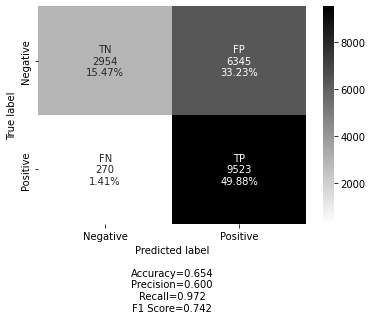

In [ ]:
performance(X_val_1, y_val_1, classifier1)

19092/19092


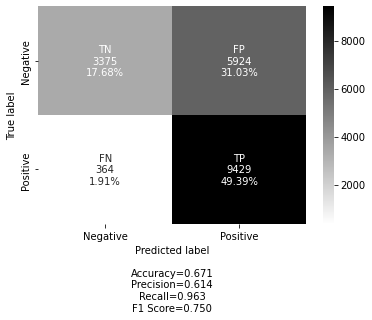

In [ ]:
performance(X_val_1, y_val_1, classifier1, threshold = 0.55)

19092/19092


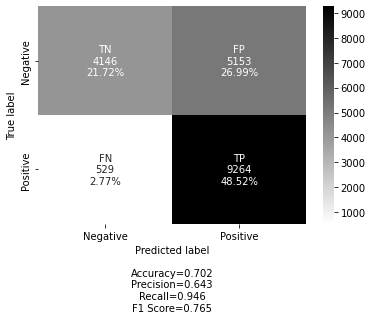

In [ ]:
performance(X_val_1, y_val_1, classifier1, threshold = 0.6)

19092/19092


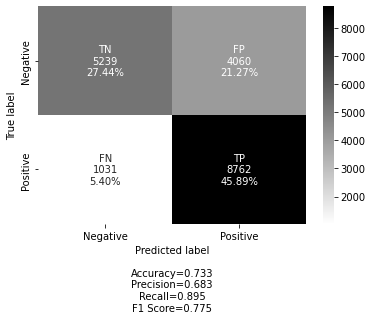

In [ ]:
performance(X_val_1, y_val_1, classifier1, threshold = 0.65)

### Dianping 

19092/19092


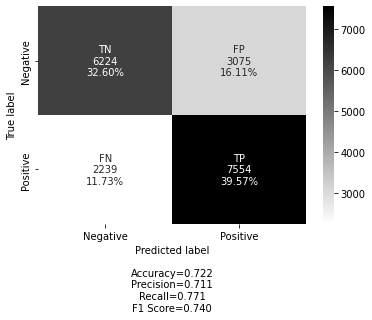

In [ ]:
performance(X_val_1, y_val_1, classifier2)

19092/19092


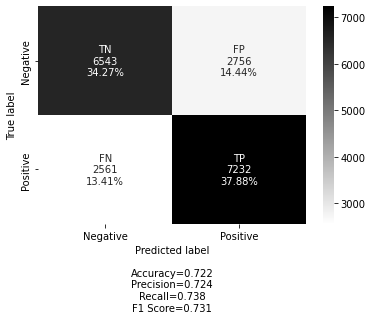

In [ ]:
performance(X_val_1, y_val_1, classifier2, threshold = 0.55)

19092/19092


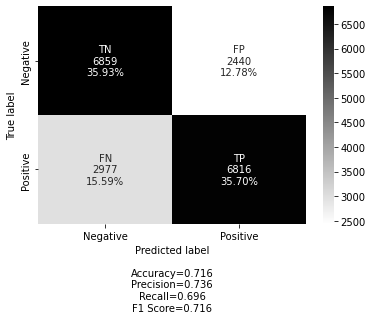

In [ ]:
performance(X_val_1, y_val_1, classifier2, threshold = 0.6)

19092/19092


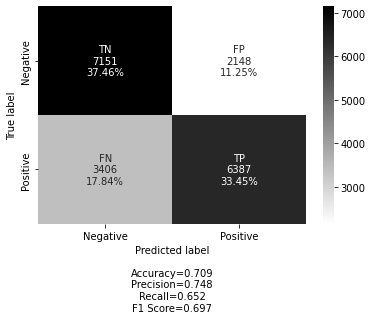

In [ ]:
performance(X_val_1, y_val_1, classifier2, threshold = 0.65)

## Check Performance

### JD Binary 

19093/19093


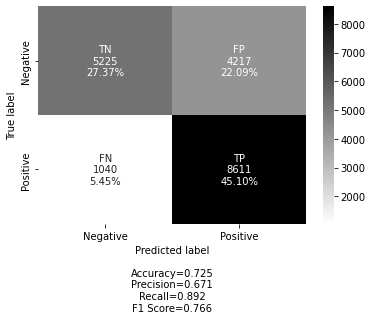

In [ ]:
performance(X_test_1, y_test_1, classifier1, threshold = 0.65)

19093/19093


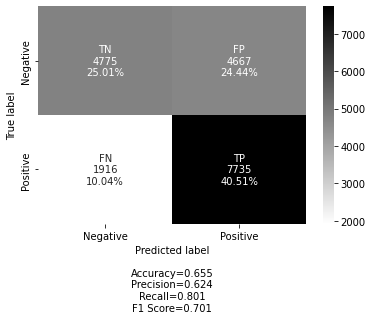

In [ ]:
performance(X_test_2, y_test_2, classifier1, threshold = 0.65)

### Dianping

19093/19093


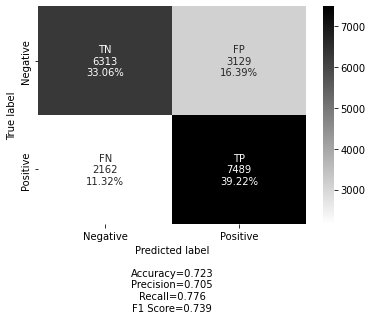

In [ ]:
performance(X_test_1, y_test_1, classifier2, threshold = 0.5)

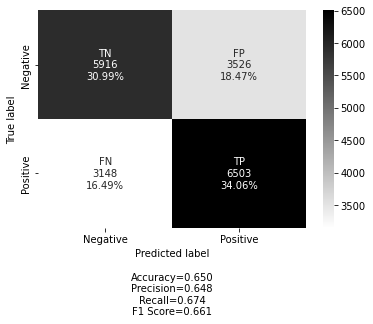

In [ ]:
performance(X_test_2, y_test_2, classifier2, threshold = 0.5)